# Prepare a prediction model for predicting profit of 50_Startups

In [92]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [93]:
#Loading data
data = pd.read_csv("50_Startups.csv")

# EDA

In [94]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [95]:
order = [3,0,1,2,4]
data= data[[data.columns [i] for i in order]]

In [96]:
data2 = data.rename({'R&D Spend':'rdspend','Administration':'administration','Marketing Spend':'marketingspend','Profit':'profit'},axis=1)
data2

,State,rdspend,administration,marketingspend,profit
0,New York,165349.20,136897.80,471784.10,192261.83
1,California,162597.70,151377.59,443898.53,191792.06
2,Florida,153441.51,101145.55,407934.54,191050.39
3,New York,144372.41,118671.85,383199.62,182901.99
4,Florida,142107.34,91391.77,366168.42,166187.94
5,New York,131876.90,99814.71,362861.36,156991.12
6,California,134615.46,147198.87,127716.82,156122.51
7,Florida,130298.13,145530.06,323876.68,155752.60
8,New York,120542.52,148718.95,311613.29,152211.77
9,California,123334.88,108679.17,304981.62,149759.96


In [97]:
data2.isna().sum()

State             0
rdspend           0
administration    0
marketingspend    0
profit            0
dtype: int64

In [98]:
data2[data2.duplicated()]

,State,rdspend,administration,marketingspend,profit


In [99]:
data2.describe()

,rdspend,administration,marketingspend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation Analysis

In [100]:
data2.corr()

,rdspend,administration,marketingspend,profit
rdspend,1.000000,0.241955,0.724248,0.972900
administration,0.241955,1.000000,-0.032154,0.200717
marketingspend,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


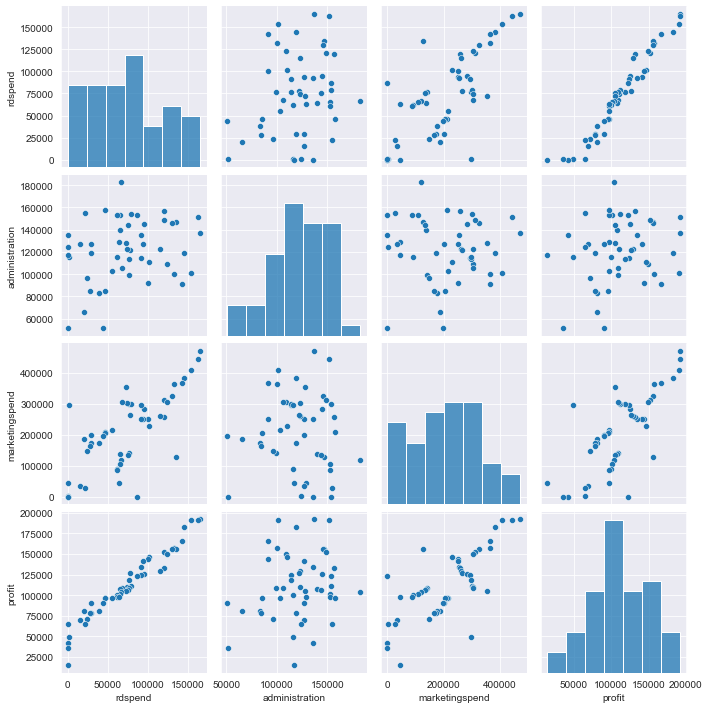

In [101]:
sns.set_style(style= 'darkgrid')
sns.pairplot(data2)

# Model Building

In [102]:
model = smf.ols('profit~rdspend+administration+marketingspend',data=data2).fit()

In [103]:
#Finding Coefficient parameters
model.params

Intercept         50122.192990
rdspend               0.805715
administration       -0.026816
marketingspend        0.027228
dtype: float64

In [104]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
rdspend           17.846374
administration    -0.525507
marketingspend     1.655077
dtype: float64 
 Intercept         1.057379e-09
rdspend           2.634968e-22
administration    6.017551e-01
marketingspend    1.047168e-01
dtype: float64


In [105]:
#Finding R-squared Values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           4.53e-30
Time:                        17:25:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple linear regression model

### Building SLR and MLR models for "Administration","Marketing spend" and "RD spend"


In [108]:
sl_a = smf.ols('profit~administration',data=data2).fit()
print(sl_a.tvalues,'\n',sl_a.pvalues)

Intercept         3.040044
administration    1.419493
dtype: float64 
 Intercept         0.003824
administration    0.162217
dtype: float64


In [109]:
sl_ms = smf.ols('profit~marketingspend',data=data2).fit()
print(sl_ms.tvalues,'\n',sl_ms.pvalues)

Intercept         7.808356
marketingspend    7.802657
dtype: float64 
 Intercept         4.294735e-10
marketingspend    4.381073e-10
dtype: float64


In [110]:
sl_rd = smf.ols('profit~rdspend',data=data2).fit()
print(sl_rd.tvalues,'\n',sl_rd.pvalues)

Intercept    19.320288
rdspend      29.151139
dtype: float64 
 Intercept    2.782697e-24
rdspend      3.500322e-32
dtype: float64


In [111]:
ml_prm= smf.ols('profit~marketingspend+rdspend',data=data2).fit()
print(ml_prm.tvalues,'\n',ml_prm.pvalues)

Intercept         17.463582
marketingspend     1.927052
rdspend           19.265555
dtype: float64 
 Intercept         3.504062e-22
marketingspend    6.003040e-02
rdspend           6.040433e-24
dtype: float64


# Model Validation Techniques

# Collinearity check

In [112]:
#1)Collinearity Problem Check
#Calculate VIF = 1/(1-Rsquare) for all independent variables

In [114]:
rsq_rd = smf.ols('rdspend~administration+ marketingspend', data =data2).fit().rsquared
vif_rd = 1/(1-rsq_rd)
vif_rd

2.468903069994701

In [115]:
rsq_ad = smf.ols('administration~ rdspend+marketingspend', data=data2).fit().rsquared
vif_ad = 1/(1-rsq_ad)
vif_ad

1.175091007055045

In [116]:
rsq_ms = smf.ols('marketingspend~ administration+rdspend', data=data2).fit().rsquared
vif_ms = 1/(1-rsq_ms)
vif_ms

2.3267732905308773

In [117]:
# Storing vif values in a data frame
d1 = {'Variables':['rdspend','administration','marketingspend'],'VIF':[vif_rd,vif_ad,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rdspend,2.468903
1,administration,1.175091
2,marketingspend,2.326773


In [118]:
#None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

c:\Users\purva\anaconda3.1\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


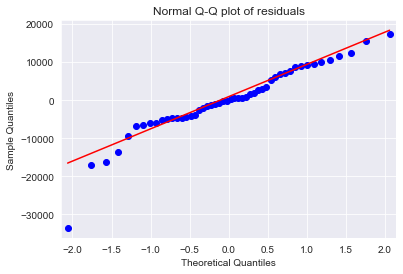

In [119]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [121]:
list(np.where(model.resid <-10000))

[array([14, 15, 48, 49], dtype=int64)]

In [122]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

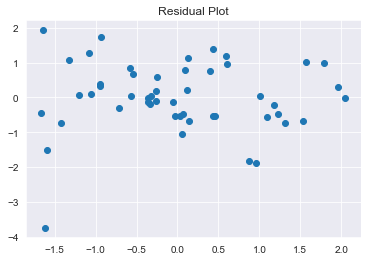

In [123]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.show() 

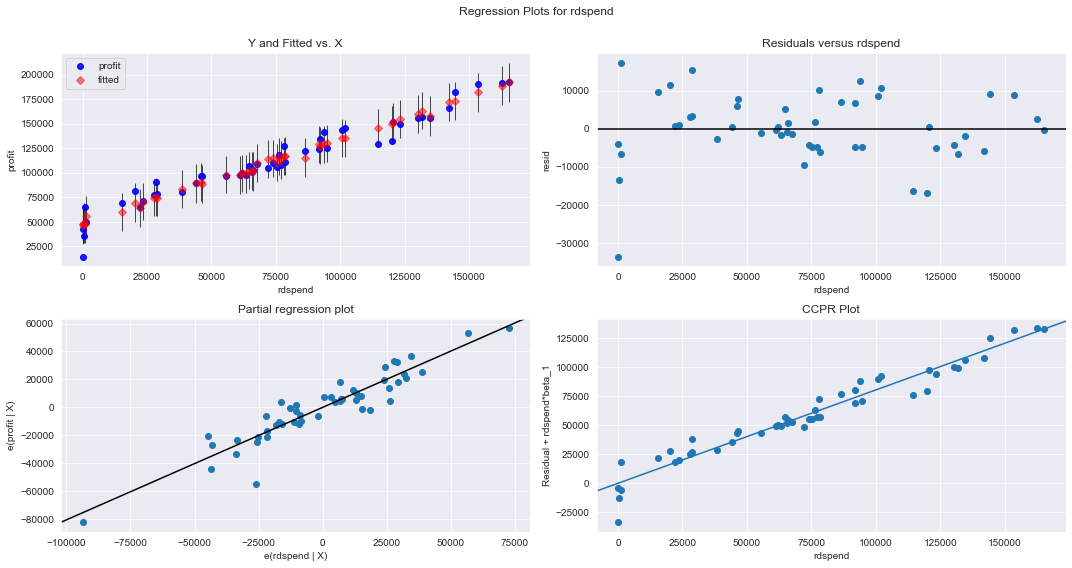

In [124]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rdspend", fig=fig)
plt.show()

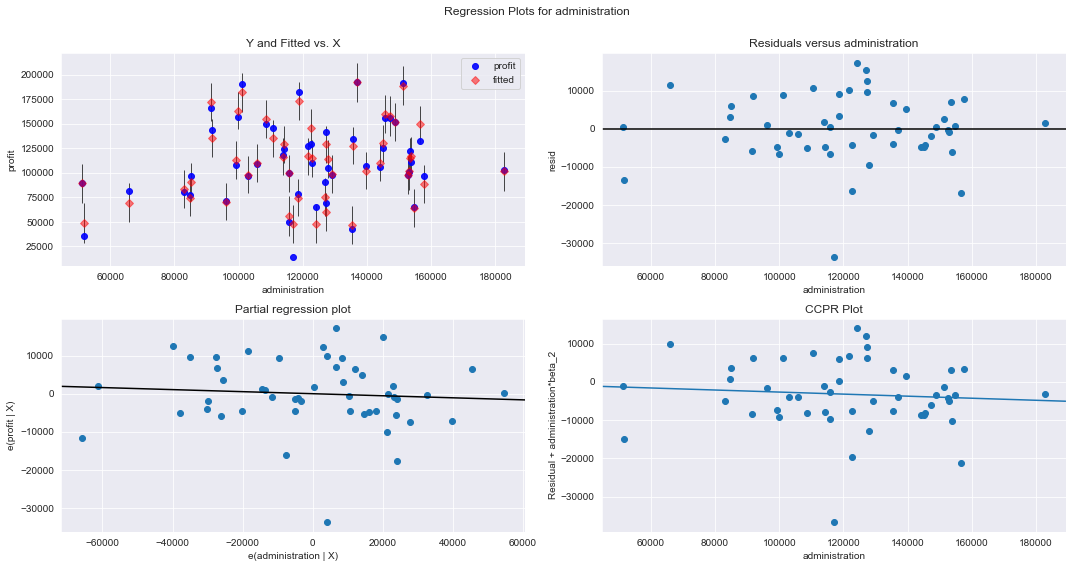

In [125]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "administration", fig=fig)
plt.show()

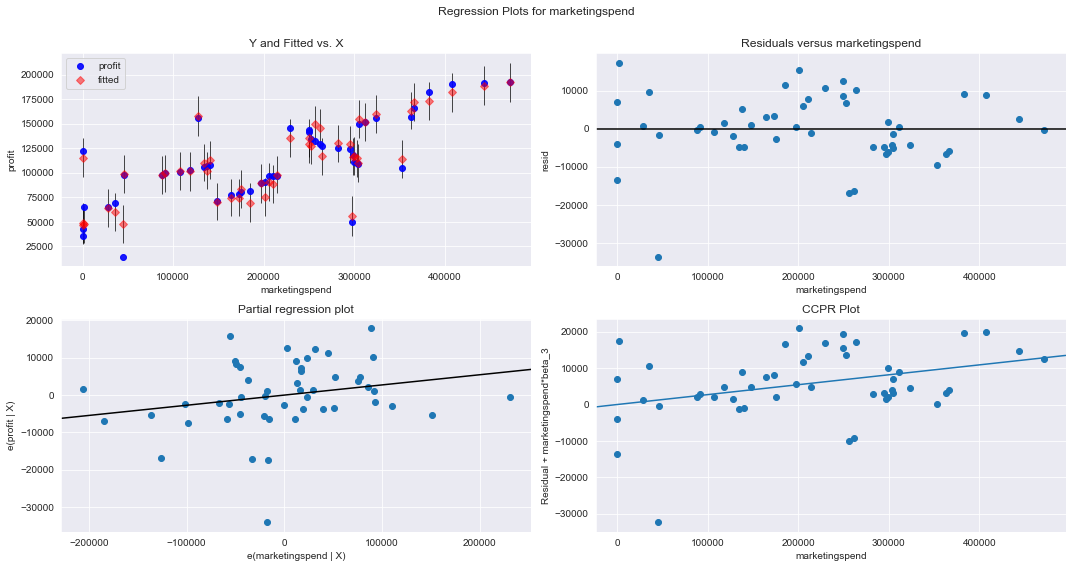

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketingspend", fig=fig)
plt.show()

# Model deletion diagnostic

In [127]:
#Cook's Distance: If Cook's distance > 1, then it's an outlier
#Get influencers using cook's distance
(c,_) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

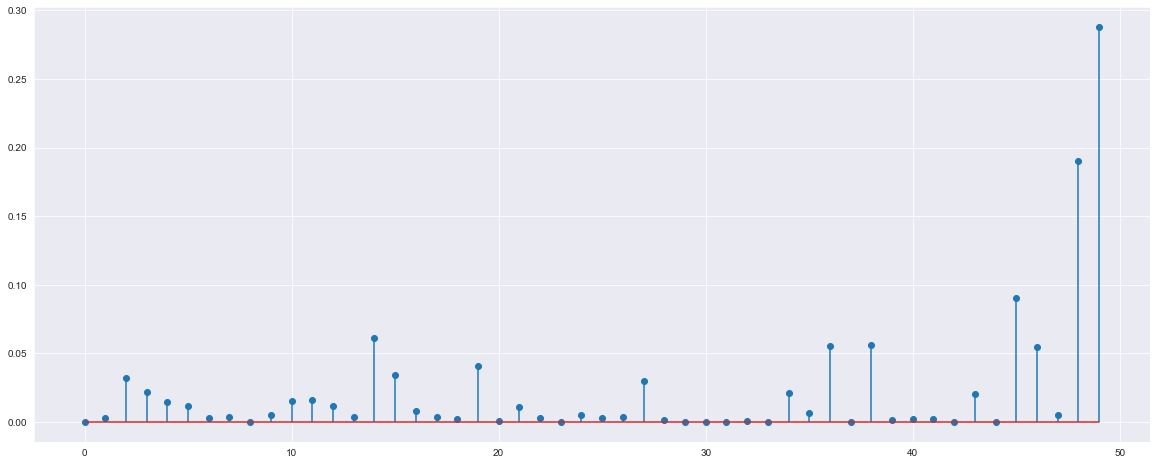

In [128]:
#Plot the influencers using the stem plot
fig = plt.figure(figsize = (20,8))
plt.stem(np.arange(len(data2)),np.round(c,5))
plt.xlabel = ('Row Index')
plt.ylabel = ('Cooks Distance')
plt.show()            

In [129]:
data2[data2.index.isin([49])]

,State,rdspend,administration,marketingspend,profit
49,California,0.0,116983.8,45173.06,14681.4


In [130]:
# Discarding the influencers and reassign the row number (reset_index(drop=True))
data2=data2.drop(data2.index[[49]],axis=0).reset_index(drop=True)
data2

,State,rdspend,administration,marketingspend,profit
0,New York,165349.20,136897.80,471784.10,192261.83
1,California,162597.70,151377.59,443898.53,191792.06
2,Florida,153441.51,101145.55,407934.54,191050.39
3,New York,144372.41,118671.85,383199.62,182901.99
4,Florida,142107.34,91391.77,366168.42,166187.94
5,New York,131876.90,99814.71,362861.36,156991.12
6,California,134615.46,147198.87,127716.82,156122.51
7,Florida,130298.13,145530.06,323876.68,155752.60
8,New York,120542.52,148718.95,311613.29,152211.77
9,California,123334.88,108679.17,304981.62,149759.96


In [131]:
final_model =smf.ols('profit~rdspend+administration+marketingspend',data=data2).fit()

In [132]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           8.85e-32
Time:                        17:26:28   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rdspend            0.7830      0.038     20.470      0.000       0.706       0.860
administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketingspend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model predictions

In [133]:
new_data=pd.DataFrame({'rdspend':60000,"administration":100000,"marketingspend":160000},index=[0])
new_data

,rdspend,administration,marketingspend
0,60000,100000,160000


In [134]:
final_model.predict(new_data)

0    101179.794879
dtype: float64

In [135]:
pred_y = final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [136]:
t1 ={'my_models':['model','model2'],'Rsquared':[model.rsquared,final_model.rsquared]}
t2 = pd.DataFrame(t1)
t2

,my_models,Rsquared
0,model,0.950746
1,model2,0.961316
